# Titanic Solution Using Speedml 使用Speedml泰坦尼克号解决方案

### This notebook uses the [Speedml](https://speedml.com)  Python package to speed start machine learning projects.

### 本笔记本使用[Speedml](https://speedml.com) Python包来快速启动机器学习项目。

Speedml integrates best ML packages and popular strategies used by top data scientists in an easy to use Python package.

Speedml集成了最好的ML包和顶级数据科学家使用的流行策略，便于使用Python包。

> Using Speedml on Titanic dataset we **quickly jumped from low 80% rank to top 20% rank**, within just a few feature engineering iterations.

>在泰坦尼克号数据集上使用Speedml，我们很快就从低80%跃升至20%的排名**，仅在几个特征工程的迭代中。

Speedml is under active development and Kaggle version of the API may not be the latest. For demonstrating the latest Speedml features we have also created the same notebook on GitHub.

Speedml正在积极开发，而Kaggle版本的API可能不是最新的。为了演示最新的Speedml特性，我们还在GitHub上创建了相同的笔记本。

### Download the latest version of [this notebook from GitHub](https://github.com/Speedml/notebooks/blob/master/titanic/titanic-solution-using-speedml.ipynb).

### 从GitHub下载这个笔记本的最新版本

### Table of Contents 表的内容

- Loading the datasets.
- Differentiating between numerical, categorical, high-cardinality, and continuous features.
- Feature correlation heatmap matrix.
- Feature distribution for outliers detection.
- Plotting continuous features for outliers detection.
- Plotting categorical features for outliers detection.
- Fixing outliers with a single line of code.
- Plotting continuous features against categorical features.
- Feature engineering for high-cardinality.
- New feature extraction from existing features.
- Hyper-parameters tuning for model classifier.
- Model evaluation and accuracy ranking.
- Model prediction and feature selection.
- Saving the results.


- 加载数据集。
- 区分数字、分类、高基数和连续特征。
- 特征相关热图矩阵。
- 异常值检测的特征分布。
- 为异常值检测绘制连续特征。
- 为离群值检测绘制分类特征。
- 用一行代码修复异常值。
- 根据分类特征绘制连续特征。
- 高基数的特征工程。
- 现有功能的新特征提取。
- 模型分类器的超参数调优。
- 模型评估和准确性排名。
- 模型预测和特征选择。
- 保存结果。

## Getting Started 开始

To get started all you need to do is include one package in your project. Speedml includes pandas, sklearn, numpy, xgboost, by default so you do not need to import these.

首先，您需要在项目中包含一个包。在默认情况下，Speedml包括了pandas、sklearn、numpy和xgboost，所以您不需要导入它们。

In [1]:
from speedml import Speedml

It takes one line of code to initialize train, test datasets, define the target and unique id variables. This also initializes wrapper components for EDA (sml.plot), XGBoost (sml.xgb), modeling (sml.model), feature engineering (sml.feature) and more...

它需要一行代码来初始化训练，测试数据集，定义目标和唯一的id变量。 这也初始化EDA（sml.plot），XGBoost（sml.xgb），建模（sml.model），特征工程（sml.feature）等等的包装组件。

In [3]:
# sml = Speedml('../input/titanic/train.csv', 
#               '../input/titanic/test.csv', 
#               target = 'Survived',
#               uid = 'PassengerId')

sml = Speedml('train.csv', 
              'test.csv', 
              target = 'Survived',
              uid = 'PassengerId')
sml.shape()

'train (891, 11) | test (418, 10)'

## Configure 配置

Speedml workflow and analytics are user configurable. Following method call configures the threshold for identifying if we may be over-fitting our model based on ratio of features compared with samples. The method returns default (call without arguments) or updated configuration dictionary.

Speedml工作流和分析是用户可配置的。 以下方法调用配置阈值以确定我们是否可能过度拟合基于特征与样本相比的模型。 该方法返回默认值（不带参数的调用）或更新的配置字典。

> Here we are (re)setting the overfit_threshold to $\frac{\sqrt{N}}{N}$ where $N$ is the number of samples in the train dataset. The rule of thumb is to have number of highly correlated features to be less than $\sqrt{N}$ to avoid over-fitting. If features are not correlated then this number can go as high as $N - 1$.

>在这里，我们将overfit_threshold设置为$\frac{\sqrt{N}}{N}$，其中$N$是训练数据集中的样本数目。经验法则是，有许多高度相关的特性要小于$\sqrt{N}$以避免过度拟合。如果特征不相关，那么这个数字可以高达$N - 1$。

Also note how intuitively Speeml exposes the methods like sqrt of popular packages like numpy and pandas objects like the train dataframe.

还需要注意的是，直观的Speeml是如何暴露像sqrt这样的流行软件包，如numpy和pandas对象，比如训练dataframe。

In [5]:
# high_cardinality :高基数，10
# outlier_threshold:离群值阈值，3
# outpath:输出路径，output/
# overfit_threshold:过拟合阀值，0.033501260508640406
# unique_ratio: 唯一的比例，80
sml.configure('overfit_threshold', 
              sml.np.sqrt(sml.train.shape[0]) / sml.train.shape[0])

{'high_cardinality': 10,
 'outlier_threshold': 3,
 'outpath': 'output/',
 'overfit_threshold': 0.033501260508640406,
 'unique_ratio': 80}

## Speed EDA

Then returning results from just one Speedml method performs quick EDA on the entire dataset.

然后从一个Speedml方法返回结果，对整个数据集执行快速EDA。

In [6]:
# Observations:观察
# Speedml Release：Speedml 释放
# Nulls: 空值
# Outliers Upper:离群值上
# Shape:数据的形状
# Numerical Ratio:数值比
# Numerical High-cardinality：高基数
# Numerical Categorical：数值分类
# Text High-cardinality	：文本的高聚合度
# Text Categorical：文本分类
# Text Unique:文本独特的
# Target Analysis (Survived):目标分析(生存)
sml.eda()

,Results,Observations
Speedml Release,v0.9.3,Visit https://speedml.com for release notes.
Nulls,1014,Use feature.impute.
Outliers Upper,"[SibSp, Fare]",Positive skew (> 3). Use feature.outliers(upper).
Shape,"train (891, 11) | test (418, 10)",
Numerical Ratio,54%,Aim for 100% numerical.
Numerical High-cardinality,"[Age, Fare]",(>10) categories. Use feature.density
Numerical Categorical,"[Survived, Pclass, SibSp, Parch]",Use plot.ordinal.
Text High-cardinality,"[Ticket, Cabin]",(>10) categories. Use feature.labels.
Text Categorical,"[Embarked, Sex]",Use feature.labels or feature.mapping.
Text Unique,[Name],~80% unique. Use feature.extract or feature.drop.


**Observations**

**观察**

- Most model classifiers cannot handle NaN or null values. Data wrangle these to remove all null values.
- Models require numerical datasets so converting 100% of features to numerical is a data wrangling and feature engineering goal.
- High-cardinality features or features with lots of categories need to be addressed in a special manner for better model performance. One of the feature engineering strategies is banding of ranges of values for reducing the number of categories. Another strategy is to determine density of repeating values.
- Categorical numerical features can be plotted differently (plot bars, histograms) from high-cardinality or continuous features (use scatter plots).
- Non-categorical text features cannot be directly converted to numeric. These are candidates for feature extraction by identifying repeating patterns.


- 大多数模型分类器不能处理NaN或空值。 数据缠绕这些以删除所有空值。
- 模型需要数字数据集，因此将100％的特征转换为数字是数据争夺和特征工程目标。
- 需要以特殊方式解决具有许多类别的高基数特性或功能，以获得更好的模型性能。 其中一项特色工程策略是用于减少类别数量的一系列值。 另一个策略是确定重复值的密度。
- 分类数值特征可以根据高基数或连续特征（使用散点图）以不同方式绘制（绘图条，直方图）。
- 非分类文本特征不能直接转换为数字。 这些是通过识别重复模式进行特征提取的候选项。

In [7]:
sml.train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Feature Correlations 特征相关性

You can quickly check feature correlations using a plot. Learn how to interpret this plot at https://speedml.com/plot-correlation-of-features/ 

您可以使用绘图快速检查特征相关性。 通过https://speedml.com/plot-correlation-of-features/ 了解如何解读此图。

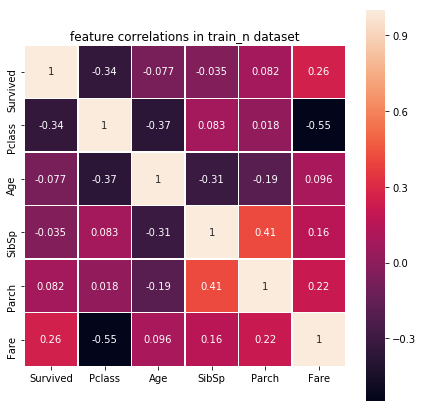

In [8]:
sml.plot.correlate()

## Outliers Detection and Fix 异常值检测和修复

We can use distributions to understand skew (left/right) for determining outliers.

我们可以使用分布来理解偏差(左/右)来确定异常值。

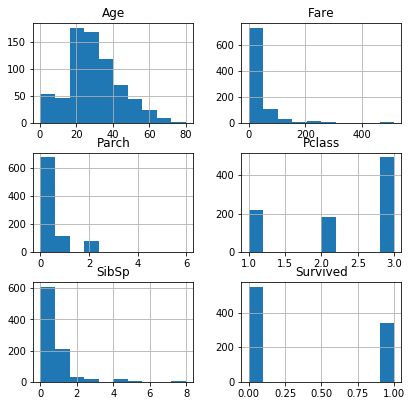

In [9]:
sml.plot.distribute()

Continuous or high-cardinality numerical features are better plotted using scatter plot for determining outliers.

使用散点图更好地绘制连续或高基数数字特征以确定异常值。

We do not expect outliers in case of Age feature as the distribution plot is fairly close to normal (rising in the middle of x-axis and falling on either sides evenly).


我们不希望出现年龄特征的异常值，因为分布图非常接近正常（在x轴的中间上升并且均匀地落在两侧）。

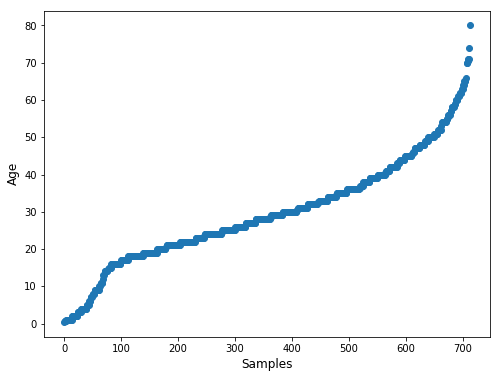

In [10]:
sml.plot.continuous('Age')

The method clearly shows some outliers in case of Fare feature. This coincides with our observation from the distribution plot for the Fare feature which is skewed towards left.

在票价特征的情况下，该方法清楚地显示了一些异常值。 这与我们从票价特征向左倾斜的分布图的观察一致。

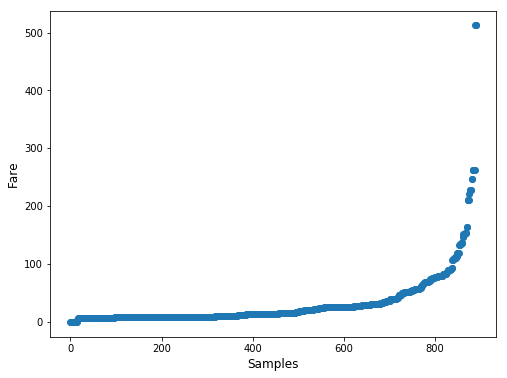

In [11]:
sml.plot.continuous('Fare')

To correct the outliers we fix only values in upper range of the 99th percentile. As the results show these constitute around 1% of overall samples.

为了纠正异常值，我们只修正第99个百分点的上限范围内的值。 结果表明，这些构成了总体样本的1％左右。

In [15]:
# 在'Fare'这列的数设置为98%上限范围内的值
sml.feature.outliers('Fare', upper=98)

'Fixed 0 or 0.00% upper outliers. '

While we impact only a few samples, the outliers fix is fairly significant as shown by the same plot after the fix.

虽然我们仅影响少数样本，但异常值修正非常显着，如修复后的相同绘图所示。

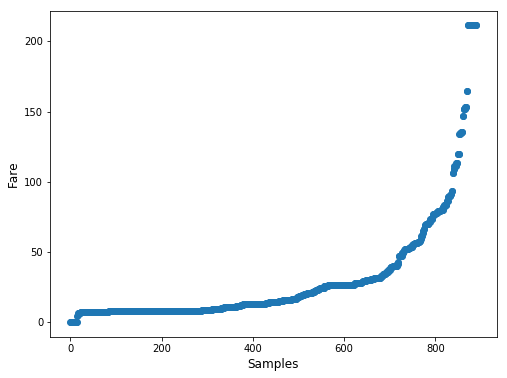

In [14]:
sml.plot.continuous('Fare')

We throw-in another plot into the mix just to understand how the remaining (potential) outliers are spread across when correlating with seemingly related features. We know that the passenger class and fare paid may be significantly correlated. As the plot points in upper range mostly stick to Pclass=1 we can safely assume no further fixing is required for the Fare feature.

我们在混合中插入另一个曲线，以了解与表面上相关的特征相关时剩余（潜在）异常值如何分布。

我们知道，乘客级别（Pclass）和票价（Fare）可能显着相关。

由于上限范围内的绘图点大多保持在Pclass = 1，因此我们可以安全地假定票价特征不需要进一步修复。

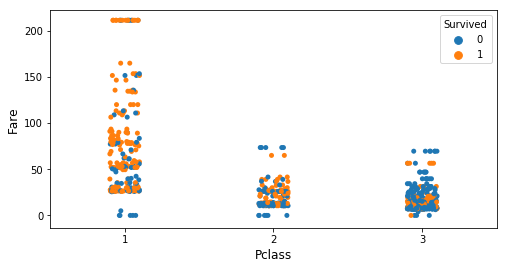

In [16]:
sml.plot.strip('Pclass', 'Fare')

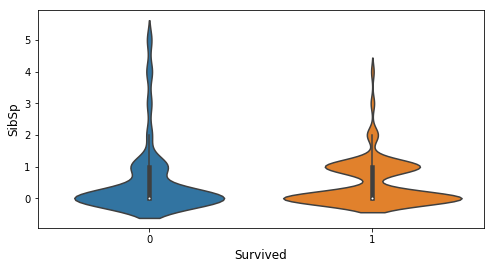

Fixed 0 or 0.00% upper outliers. 


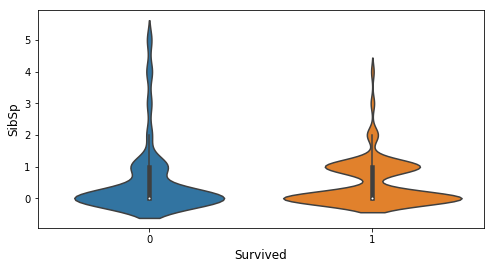

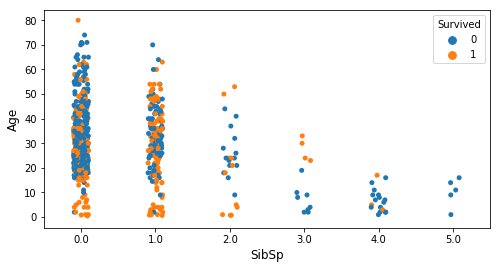

In [19]:
sml.plot.ordinal('SibSp')
print(sml.feature.outliers('SibSp', upper=99))
sml.plot.ordinal('SibSp')
sml.plot.strip('SibSp', 'Age')

## Feature Engineering For High-Cardinality 高基数的特征工程

High-cardinality features like Ticket and Age are candidates for feature engineering. We use the density method to create a new feature based on Age and Ticket and drop the Ticket feature in turn. This simple iteration improves our model significantly and helps us jump 100s of positions on the Kaggle leaderboard.

Ticket和Age等高基数特征是特征工程的候选特征。

我们使用密度方法根据Age和Ticket创建新特征，并依次放弃Ticket特征。

这个简单的迭代显着改善了我们的模型，并帮助我们在Kaggle排行榜上跳过100多个位置。

In [20]:
sml.eda()

,Results,Observations
Speedml Release,v0.9.3,Visit https://speedml.com for release notes.
Nulls,1014,Use feature.impute.
Shape,"train (891, 11) | test (418, 10)",
Numerical Ratio,54%,Aim for 100% numerical.
Numerical High-cardinality,"[Age, Fare]",(>10) categories. Use feature.density
Numerical Categorical,"[Survived, Pclass, SibSp, Parch]",Use plot.ordinal.
Text High-cardinality,"[Ticket, Cabin]",(>10) categories. Use feature.labels.
Text Categorical,"[Embarked, Sex]",Use feature.labels or feature.mapping.
Text Unique,[Name],~80% unique. Use feature.extract or feature.drop.
Target Analysis (Survived),Model ready.,Use classification models.


In [21]:
# density是密度方法：
sml.feature.density('Age')
sml.train[['Age', 'Age_density']].head()

,Age,Age_density
0,22.0,27
1,38.0,11
2,26.0,18
3,35.0,18
4,35.0,18


In [22]:
sml.feature.density('Ticket')
sml.train[['Ticket', 'Ticket_density']].head()

,Ticket,Ticket_density
0,A/5 21171,1
1,PC 17599,1
2,STON/O2. 3101282,1
3,113803,2
4,373450,1


In [23]:
sml.feature.drop(['Ticket'])

'Dropped 1 features with 12 features available.'

## Extracting New Features 提取的新特性

We will now extract new features Deck from Cabin and FamilySize from Parch and SibSp.

我们现在将从Parch和SibSp中提取Cabin和FamilySize的新特征。

- Parch: The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them.


- 数据集以这种方式定义了家庭关系。
- 父母=母亲,父亲
- 孩子=女儿，儿子，继女，继子。
- 有些孩子只带着保姆去旅行，所以他们的父母都是孩子。


- Sibsp: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)


- 数据集以这种方式定义了家庭关系。
- 兄弟，姐妹，继兄弟，继姐妹。
- 配偶=丈夫、妻子(情妇和未婚夫被忽略)

In [24]:
sml.plot.crosstab('Survived', 'SibSp')

SibSp,0.0,1.0,2.0,3.0,4.0,5.0
Survived,,,,,,
0,398,97,15,12,15,12
1,210,112,13,4,3,0


In [25]:
sml.plot.crosstab('Survived', 'Parch')

Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,445,53,40,2,4,4,1
1,233,65,40,3,0,1,0


In [26]:
# 让Cabin列空的填满'Z'
sml.feature.fillna(a='Cabin', new='Z')
# 创建新列'Deck'，提取'Cabin'特征，regex='([A-Z]){1}'是在字符串中首位字符A-Z取一个。
sml.feature.extract(new='Deck', a='Cabin', regex='([A-Z]){1}')
# 删除'Cabin'列。
sml.feature.drop(['Cabin'])
# 让'Sex'的男和女转为0和1
sml.feature.mapping('Sex', {'male': 0, 'female': 1})
# 创建新特征'FamilySize'，把'Parch'和'SibSp'的值加起来赋值给'FamilySize'.
sml.feature.sum(new='FamilySize', a='Parch', b='SibSp')
# 添加特征'FamilySize'
sml.feature.add('FamilySize', 1)

'Filled 1014 null values across test and train datasets.'

'Dropped 1 features with 12 features available.'

In [28]:
sml.train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Age_density,Ticket_density,Deck,FamilySize
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1.0,0,7.2500,S,27,1,Z,2.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1.0,0,71.2833,C,11,1,C,2.0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0.0,0,7.9250,S,18,1,Z,1.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1.0,0,53.1000,S,18,2,C,2.0
4,0,3,"Allen, Mr. William Henry",0,35.0,0.0,0,8.0500,S,18,1,Z,1.0


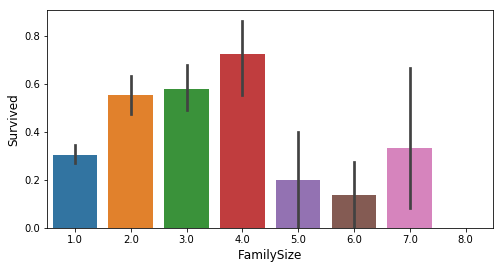

In [29]:
sml.plot.bar('FamilySize', 'Survived')

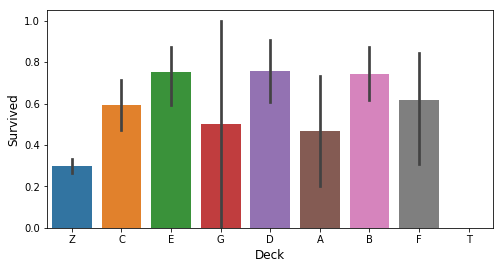

In [30]:
sml.plot.bar('Deck', 'Survived')

In [31]:
sml.feature.drop(['Parch', 'SibSp'])

'Dropped 2 features with 11 features available.'

In [32]:
sml.train.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Age_density,Ticket_density,Deck,FamilySize
0,0,3,"Braund, Mr. Owen Harris",0,22.0,7.2500,S,27,1,Z,2.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,71.2833,C,11,1,C,2.0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,7.9250,S,18,1,Z,1.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,53.1000,S,18,2,C,2.0
4,0,3,"Allen, Mr. William Henry",0,35.0,8.0500,S,18,1,Z,1.0


Here is a single line of code to impute all empty features values (numerical and text) with numerical median or most common text value.

以下是一行代码，用于计算所有空值特征值（数值和文本），其中包含数值中位数或最常见的文本值。

In [33]:
sml.feature.impute()

'Imputed 179 empty values to 0.'

In [34]:
sml.train.head()

,Age,Age_density,Deck,Embarked,FamilySize,Fare,Name,Pclass,Sex,Survived,Ticket_density
0,22.0,27,Z,S,2.0,7.2500,"Braund, Mr. Owen Harris",3,0,0,1
1,38.0,11,C,C,2.0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,1,1
2,26.0,18,Z,S,1.0,7.9250,"Heikkinen, Miss. Laina",3,1,1,1
3,35.0,18,C,S,2.0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,1,2
4,35.0,18,Z,S,1.0,8.0500,"Allen, Mr. William Henry",3,0,0,1


In [35]:
sml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 11 columns):
Age               891 non-null float64
Age_density       891 non-null int64
Deck              891 non-null object
Embarked          891 non-null object
FamilySize        891 non-null float64
Fare              891 non-null float64
Name              891 non-null object
Pclass            891 non-null int64
Sex               891 non-null int64
Survived          891 non-null int64
Ticket_density    891 non-null int64
dtypes: float64(3), int64(5), object(3)
memory usage: 83.5+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 10 columns):
Age               418 non-null float64
Age_density       418 non-null int64
Deck              418 non-null object
Embarked          418 non-null object
FamilySize        418 non-null float64
Fare              418 non-null float64
Name              418 non-null object
Pc

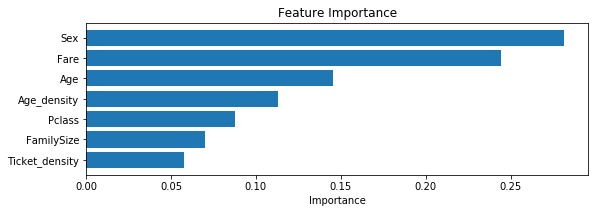

In [36]:
# 查看特征的重要性。
sml.plot.importance()

In [37]:
sml.train.head()

,Age,Age_density,Deck,Embarked,FamilySize,Fare,Name,Pclass,Sex,Survived,Ticket_density
0,22.0,27,Z,S,2.0,7.2500,"Braund, Mr. Owen Harris",3,0,0,1
1,38.0,11,C,C,2.0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,1,1
2,26.0,18,Z,S,1.0,7.9250,"Heikkinen, Miss. Laina",3,1,1,1
3,35.0,18,C,S,2.0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,1,2
4,35.0,18,Z,S,1.0,8.0500,"Allen, Mr. William Henry",3,0,0,1


In [38]:
# 创建新特征'Title'，提取特征'Name'的英文字符串+.。
sml.feature.extract(new='Title', a='Name', regex=' ([A-Za-z]+)\.')
sml.plot.crosstab('Title', 'Sex')

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


In [39]:
# 在'Title'特征里面的['Lady', 'Countess','Capt', 'Col',\
#'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']替换为'Rare'
sml.feature.replace(a='Title', match=['Lady', 'Countess','Capt', 'Col',\
'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], new='Rare')
# 在'Title'特征里面的'MLLE'替换为Miss;
sml.feature.replace('Title', 'Mlle', 'Miss')
sml.feature.replace('Title', 'Ms', 'Miss')
sml.feature.replace('Title', 'Mme', 'Mrs')

'Replaced matching list of strings across train and test datasets.'

'Replaced 2 matching values across train and test datasets.'

'Replaced 2 matching values across train and test datasets.'

'Replaced 1 matching values across train and test datasets.'

In [40]:
sml.train[['Name', 'Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [41]:
# 删除特征'Name'
sml.feature.drop(['Name'])
# 把文本变成数字，A ：1，B：2，C：3...
sml.feature.labels(['Title', 'Embarked', 'Deck'])
sml.train.head()

'Dropped 1 features with 11 features available.'

,Age,Age_density,Deck,Embarked,FamilySize,Fare,Pclass,Sex,Survived,Ticket_density,Title
0,22.0,27,8,2,2.0,7.2500,3,0,0,1,2
1,38.0,11,2,0,2.0,71.2833,1,1,1,1,3
2,26.0,18,8,2,1.0,7.9250,3,1,1,1,1
3,35.0,18,2,2,2.0,53.1000,1,1,1,2,3
4,35.0,18,8,2,1.0,8.0500,3,0,0,1,2


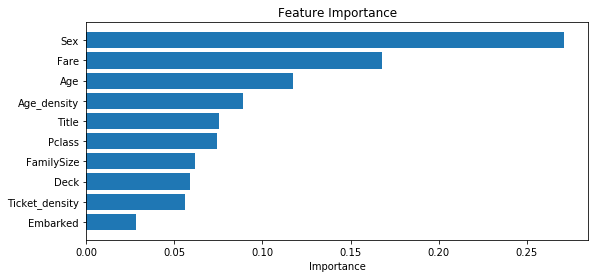

In [42]:
# 查看特征重要性。
sml.plot.importance()

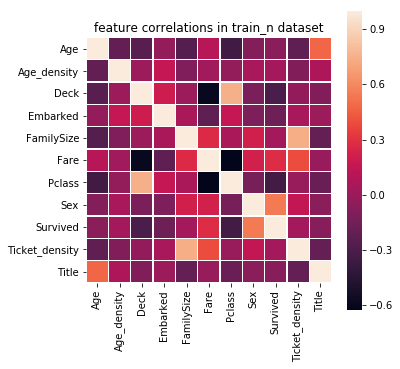

In [44]:
# 查看特征相关性
sml.plot.correlate()

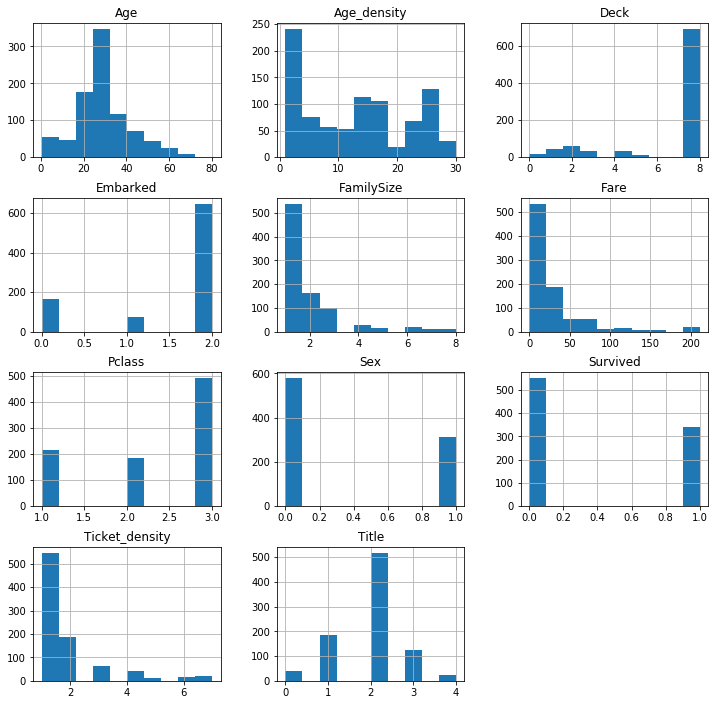

In [45]:
sml.plot.distribute()

In [46]:
sml.eda()

,Results,Observations
Speedml Release,v0.9.3,Visit https://speedml.com for release notes.
Shape,"train (891, 11) | test (418, 10)",
Numerical High-cardinality,"[Age, Age_density, Fare]",(>10) categories. Use feature.density
Numerical Categorical,"[Deck, Embarked, FamilySize, Pclass, Sex, Surv...",Use plot.ordinal.
Target Analysis (Survived),Model ready.,Use classification models.


In [47]:
sml.model.data()

'train_X: (891, 10) train_y: (891,) test_X: (418, 10)'

## Hyper-parameters Tuning 超参数调整

This is an important step in the workflow. We optimize the hyper-parameters used for our XGBoost classifier to get the best results. We do this iteratively by setting certain hyper-parameters as fixed while checking permutations for two select parameters at a time.

这是工作流程中的一个重要步骤。 我们优化用于XGBoost分类器的超参数，以获得最佳结果。

我们通过将某些超参数设置为固定输入参数，同时检查其他两个选择参数来执行此操作，直到找到最优参数。

The resulting table ranks the permutations based on accuracy, highest rank = 1.

结果表格根据准确性排列，最高排名= 1。

We now substitute the highest ranking parameters as fixed in the next round of optimization, selecting an alternate pair of parameters to optimize this time. Repeat this process for as many parameters as required. Normally two rounds of tuning is sufficient.

我们现在用下一轮优化中固定的最高排名参数替代，选择一对可选参数来优化这个时间。 

根据需要重复此过程中的参数。 通常两轮调整就足够了。

In [48]:
select_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}
fixed_params = {'learning_rate': 0.1, 'subsample': 0.8, 
                'colsample_bytree': 0.8, 'seed':0, 
                'objective': 'binary:logistic'}

sml.xgb.hyper(select_params, fixed_params)

D:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\envs\tensorflow-gpu\

,rank,params
0,1,"{'max_depth': 3, 'min_child_weight': 1}"
7,2,"{'max_depth': 7, 'min_child_weight': 3}"
3,3,"{'max_depth': 5, 'min_child_weight': 1}"
5,3,"{'max_depth': 5, 'min_child_weight': 5}"
8,3,"{'max_depth': 7, 'min_child_weight': 5}"
1,6,"{'max_depth': 3, 'min_child_weight': 3}"
4,6,"{'max_depth': 5, 'min_child_weight': 3}"
2,8,"{'max_depth': 3, 'min_child_weight': 5}"
6,9,"{'max_depth': 7, 'min_child_weight': 1}"


In [49]:
select_params = {'learning_rate': [0.3, 0.1, 0.01], 'subsample': [0.7,0.8,0.9]}
fixed_params = {'max_depth': 3, 'min_child_weight': 1, 
                'colsample_bytree': 0.8, 'seed':0, 
                'objective': 'binary:logistic'}

sml.xgb.hyper(select_params, fixed_params)

D:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\envs\tensorflow-gpu\

,rank,params
3,1,"{'learning_rate': 0.1, 'subsample': 0.7}"
4,2,"{'learning_rate': 0.1, 'subsample': 0.8}"
5,3,"{'learning_rate': 0.1, 'subsample': 0.9}"
1,4,"{'learning_rate': 0.3, 'subsample': 0.8}"
0,5,"{'learning_rate': 0.3, 'subsample': 0.7}"
2,6,"{'learning_rate': 0.3, 'subsample': 0.9}"
6,7,"{'learning_rate': 0.01, 'subsample': 0.7}"
7,8,"{'learning_rate': 0.01, 'subsample': 0.8}"
8,9,"{'learning_rate': 0.01, 'subsample': 0.9}"


In [50]:
tuned_params = {'learning_rate': 0.1, 'subsample': 0.8, 
                'max_depth': 3, 'min_child_weight': 1,
                'seed':0, 'colsample_bytree': 0.8, 
                'objective': 'binary:logistic'}
sml.xgb.cv(tuned_params)

D:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\speedml\xgb.py:54: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  self.error = self.cv_results.get_value(len(self.cv_results) - 1, 'test-error-mean')


In [62]:
sml.xgb.cv_results

,test-error-mean,test-error-std,train-error-mean,train-error-std
0,0.212165,0.027657,0.179009,0.009764
1,0.202052,0.038083,0.173119,0.002811
2,0.188569,0.018484,0.170875,0.001564
3,0.184075,0.013163,0.169191,0.001358
4,0.181828,0.015014,0.167227,0.002970
5,0.179580,0.014295,0.166105,0.003265
6,0.177340,0.013706,0.163580,0.004495
7,0.179587,0.015628,0.159373,0.004952
8,0.181834,0.016288,0.157690,0.004968
9,0.181834,0.016288,0.159373,0.002686


In [61]:
sml.xgb.cv_results.shape[0]

16

In [52]:
tuned_params['n_estimators'] = sml.xgb.cv_results.shape[0] - 1
sml.xgb.params(tuned_params)

## Model Evaluation and Prediction 模型评价和预测

We can now evaluate various models against our datasets to see which one is best suited.

我们现在可以根据我们的数据集评估各种模型，以确定哪种模型最适合。

In [53]:
sml.xgb.classifier()

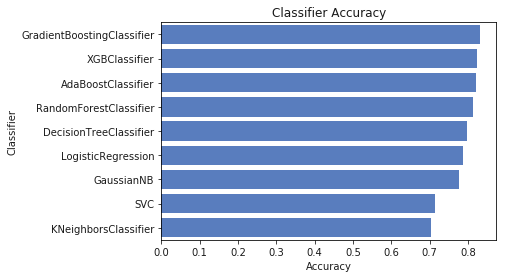

In [54]:
sml.model.evaluate()
sml.plot.model_ranks()

In [55]:
sml.model.ranks()

,Classifier,Accuracy
0,GradientBoostingClassifier,0.832222
0,XGBClassifier,0.824444
0,AdaBoostClassifier,0.821111
0,RandomForestClassifier,0.814444
0,DecisionTreeClassifier,0.796667
0,LogisticRegression,0.786667
0,GaussianNB,0.777778
0,SVC,0.714444
0,KNeighborsClassifier,0.703333


## Model Prediction and Feature Selection 模型预测和特征选择。

This part of our notebook trains the XGBoost model, generates the model predictions and plots features based on model assigned importance (weights).

我们笔记本的这一部分训练XGBoost模型，根据模型分配的重要性（权重）生成模型预测并绘制特征。

In [64]:
sml.xgb.fit()
sml.xgb.predict()

# sml.plot.xgb_importance()

In [65]:
# 逐渐较少特征来训练模型，看准率如何。
sml.xgb.feature_selection()

Accuracy: 79.480000%
Thresh=0.032, n=10, Accuracy: 79.48%
Thresh=0.044, n=9, Accuracy: 79.10%
Thresh=0.066, n=8, Accuracy: 77.61%
Thresh=0.069, n=7, Accuracy: 79.10%
Thresh=0.071, n=6, Accuracy: 76.49%
Thresh=0.076, n=5, Accuracy: 76.49%
Thresh=0.083, n=4, Accuracy: 69.78%
Thresh=0.099, n=3, Accuracy: 68.66%
Thresh=0.169, n=2, Accuracy: 68.66%
Thresh=0.290, n=1, Accuracy: 71.64%


In [66]:
# 预测训练集并打印准确率，也包含预测了测试集
sml.xgb.sample_accuracy()

'Accuracy = 84.51%. Found 753 correct of 891 total labels'

In [67]:
sml.save_results(
    columns={ 'PassengerId': sml.uid,
             'Survived': sml.xgb.predictions }, 
    file_path='titanic-speedml-{}.csv'.format(sml.slug()))
sml.slug()

'Results saved.'

'e17.06-m82.44-s84.51-f79.48'